In [1]:
import pandas as pd
import sqlite3 as sq
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from matplotlib import style  
from matplotlib import animation  

# invoke ipympl to make embedded interactive graph. 
# Installs best using conda install -c conda-forge ipympl
#%matplotlib ipympl

In [2]:
online_store=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/E_Commerce/Sample-Superstore2.csv", delimiter=";")
orders=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/E_Commerce/Sample-Superstore2/Order-Order.csv", delimiter=";")
customers=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/E_Commerce/Sample-Superstore2/Customer-Customer.csv",delimiter=";")
products=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/E_Commerce/Sample-Superstore2/Product-Table 1.csv",delimiter=";")
sales=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/E_Commerce/Sample-Superstore2/Sales-Sales.csv",delimiter=";")
shipment=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/E_Commerce/Sample-Superstore2/Shipment-Shipment.csv",delimiter=";")

FULL TABLE FOR EDA 

In [3]:
#Additional DataFrame with correct product_id
products2=products.iloc[:,[0,3,4]]

In [4]:
online_store.drop(labels="Row ID",axis=1,inplace=True)

In [5]:
online_store.rename(columns={"Order ID":"Order_ID","Order Date":"Order_Date","Ship Date":"Ship_Date","Ship Mode":"Ship_Mode","Customer ID":"Customer_ID","Customer Name":"Customer_Name","Postal Code":"Postal_Code","Product ID":"Product_ID","Sub-Category":"Sub_Category","Product Name":"Product_Name"},inplace=True)

In [6]:
online_store=pd.merge(online_store,products2,how="left",on=["Product_ID","Product_Name"])

In [7]:
online_store.drop(labels="Product_ID",axis=1,inplace=True)
online_store.rename(columns={"Product_ID_NEW":"Product_ID"},inplace=True)

In [8]:
online_store=online_store.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,19,12,13,14,15,16,17,18]]

In [9]:
# date
online_store["Order_Date"]=online_store["Order_Date"].astype("datetime64[ns]")

In [10]:
online_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       9994 non-null   object        
 1   Order_Date     9994 non-null   datetime64[ns]
 2   Ship_Date      9994 non-null   object        
 3   Ship_Mode      9994 non-null   object        
 4   Customer_ID    9994 non-null   object        
 5   Customer_Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal_Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product_ID     9717 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub_Category   9994 non-null   object        
 15  Product_Name   9994 n

REPLACING WRONG Product_ID

In [11]:
sales=pd.merge(sales,products,how="left",on=["Product_ID","Product_Name"])

In [12]:
sales.drop(labels=["Product_ID",'Sub_Category','Category','Product_Name'],axis=1,inplace=True)
products.drop(labels=["Product_ID"],axis=1,inplace=True)


In [13]:

sales.rename(columns={"Product_ID_NEW":"Product_ID"},inplace=True)
products.rename(columns={"Product_ID_NEW":"Product_ID"},inplace=True)

In [14]:
orders = orders.assign(id=range(1,1+len(orders)))

In [15]:
sales=sales.iloc[:,[0,1,6,2,3,4,5]]
products=products.iloc[:,[3,0,1,2]]

ADD COLUMNS 

In [16]:
online_store.head(5)

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [17]:
online_store["Price"]=(online_store["Sales"]/(1-online_store["Discount"]))/online_store["Quantity"]

In [18]:
online_store["Margin"]=online_store["Profit"]/online_store["Sales"]

In [19]:
online_store.to_excel("/Users/Yanaorfin_1/Documents/Academy/E_Commerce/online_store.xlsx")

In [20]:
online_store.to_csv("/Users/Yanaorfin_1/Documents/Academy/E_Commerce/online_store.csv")

In [21]:
online_store.head(1)

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,...,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Price,Margin
0,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,130.98,0.16


In [22]:
order_list=online_store[["Order_ID","Sub_Category","Quantity"]]

df_chairs = df[df['category']=='Chairs'].set_index('order_id').drop(['category', 'sale_value'], axis=1).add_prefix('chair_')
df_tables = df[df['category']=='Tables'].set_index('order_id').drop(['category', 'sale_value'], axis=1).add_prefix('table_')

df = df_tables.join(df_chairs)

df_out = df.groupby(['table_product_id', 'chair_product_id']).agg(sum)
df_out['times_sold'] = df.groupby(['table_product_id', 'chair_product_id']).size()
print(df_out)

In [23]:
sub_categories_list=order_list["Sub_Category"].unique().tolist()

In [24]:
sub_categories_list

['Bookcases',
 'Chairs',
 'Labels',
 'Tables',
 'Storage',
 'Furnishings',
 'Art',
 'Phones',
 'Binders',
 'Appliances',
 'Paper',
 'Accessories',
 'Envelopes',
 'Fasteners',
 'Supplies',
 'Machines',
 'Copiers']

In [25]:
df_Bookcases = order_list[order_list['Sub_Category']=='Bookcases'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Bookcases')
df_Chairs = order_list[order_list['Sub_Category']=='Chairs'].set_index('Order_ID').drop(['Sub_Category',"Quantity"], axis=1).add_prefix('Chairs')
df_Labels = order_list[order_list['Sub_Category']=='Labels'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Labels')
df_Tables = order_list[order_list['Sub_Category']=='Tables'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Tables')
df_Storage = order_list[order_list['Sub_Category']=='Storage'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Storage')
df_Furnishings = order_list[order_list['Sub_Category']=='Furnishings'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Furnishings')
df_Art = order_list[order_list['Sub_Category']=='Art'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Art')
df_Phones = order_list[order_list['Sub_Category']=='Phones'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Phones')
df_Binders = order_list[order_list['Sub_Category']=='Binders'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Binders')
df_Appliances = order_list[order_list['Sub_Category']=='Appliances'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Appliances')
df_Paper = order_list[order_list['Sub_Category']=='Paper'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Paper')
df_Accessories = order_list[order_list['Sub_Category']=='Accessories'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Accessories')
df_Envelopes = order_list[order_list['Sub_Category']=='Envelopes'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Envelopes')
df_Fasteners = order_list[order_list['Sub_Category']=='Fasteners'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Fasteners')
df_Supplies = order_list[order_list['Sub_Category']=='Supplies'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Supplies')
df_Machines = order_list[order_list['Sub_Category']=='Machines'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Machines')
df_Copiers = order_list[order_list['Sub_Category']=='Copiers'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Copiers')



In [26]:
df_orders=df_Bookcases.join(df_Chairs)

In [27]:
df_orders2=df_orders.join(df_Labels)

In [28]:
df_orders2.head(2)

,BookcasesQuantity,LabelsQuantity
Order_ID,,
CA-2014-101931,6,NaN
CA-2014-105249,4,4.0


In [29]:
df_orders2["Total"]=df_orders2["BookcasesQuantity"]+df_orders2["LabelsQuantity"]
df_orders2["Total"]=df_orders2["Total"].apply(lambda x:1 if x>0 else 0)

In [30]:
df_orders2.head(30)

,BookcasesQuantity,LabelsQuantity,Total
Order_ID,,,
CA-2014-101931,6,NaN,0
CA-2014-105249,4,4.0,1
CA-2014-111192,8,NaN,0
CA-2014-111871,10,NaN,0
CA-2014-112158,5,NaN,0
CA-2014-113271,1,NaN,0
CA-2014-114181,7,NaN,0
CA-2014-115161,2,NaN,0
CA-2014-119144,3,NaN,0


In [31]:
order_list_melt=pd.melt(order_list,id_vars=["Sub_Category"],value_vars=["Order_ID","Quantity"])

In [32]:
order_list_melt

,Sub_Category,variable,value
0,Bookcases,Order_ID,CA-2016-152156
1,Chairs,Order_ID,CA-2016-152156
2,Labels,Order_ID,CA-2016-138688
3,Tables,Order_ID,US-2015-108966
4,Storage,Order_ID,US-2015-108966
...,...,...,...
19983,Furnishings,Quantity,3
19984,Furnishings,Quantity,2
19985,Phones,Quantity,2
19986,Paper,Quantity,4


In [33]:
#order_list.pivot(index="Order_ID",columns="Sub_Category")["Quantity"]

Parameters to understand customers buying pattern

In [34]:

df_monetary=online_store.groupby("Customer_ID")["Sales"].sum()
df_monetary=df_monetary.reset_index()
df_monetary.head()

,Customer_ID,Sales
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5086.935
4,AB-10015,886.156


In [35]:
df_frequency=online_store.groupby("Customer_ID")["Order_ID"].nunique()
df_frequency=df_frequency.reset_index()
df_frequency["Frequency"]=df_frequency['Order_ID']
df_frequency.drop(labels='Order_ID',axis=1, inplace=True)
df_frequency.head()

,Customer_ID,Frequency
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,6
4,AB-10015,3


In [36]:
df_recency=online_store.groupby("Customer_ID")["Order_Date"].max()
df_recency=df_recency.reset_index()
df_recency["Recency"]=online_store["Order_Date"].max()-df_recency["Order_Date"]
df_recency.drop(labels="Order_Date",axis=1,inplace=True)
df_recency.head()

,Customer_ID,Recency
0,AA-10315,184 days
1,AA-10375,19 days
2,AA-10480,259 days
3,AA-10645,55 days
4,AB-10015,415 days


In [37]:
online_store["Order_Date"].max()


Timestamp('2017-12-30 00:00:00')

In [38]:
metric_list=pd.merge(pd.merge(df_monetary,df_frequency,on="Customer_ID"),df_recency,on="Customer_ID")
metric_list.head(5)



,Customer_ID,Sales,Frequency,Recency
0,AA-10315,5563.560,5,184 days
1,AA-10375,1056.390,9,19 days
2,AA-10480,1790.512,4,259 days
3,AA-10645,5086.935,6,55 days
4,AB-10015,886.156,3,415 days


In [39]:
metric_list["Recency"]=pd.to_numeric(metric_list["Recency"].dt.days,downcast="integer")

In [40]:
metric_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793 entries, 0 to 792
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer_ID  793 non-null    object 
 1   Sales        793 non-null    float64
 2   Frequency    793 non-null    int64  
 3   Recency      793 non-null    int16  
dtypes: float64(1), int16(1), int64(1), object(1)
memory usage: 26.3+ KB


                                                                    Removing outlires (IQR method)

In [41]:
# a function "plot_boxplot"

def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()


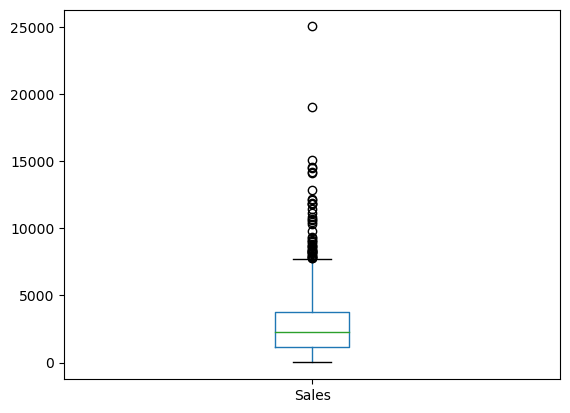

In [42]:
plot_boxplot(metric_list,"Sales")

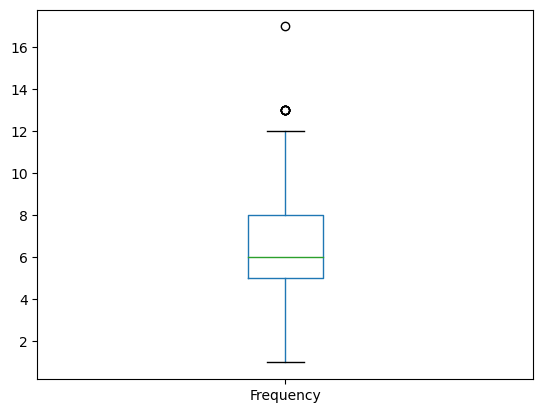

In [43]:
plot_boxplot(metric_list,"Frequency")

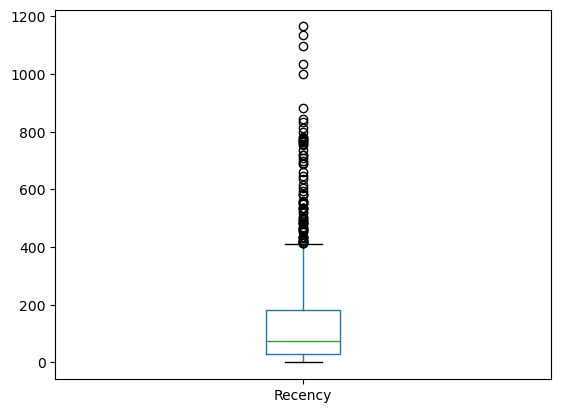

In [44]:
plot_boxplot(metric_list,"Recency")

In [45]:
metric_list.describe()

,Sales,Frequency,Recency
count,793.000000,793.000000,793.000000
mean,2903.709224,6.316520,146.802018
std,2629.986619,2.550885,186.211051
min,4.833000,1.000000,0.000000
25%,1148.780000,5.000000,30.000000
50%,2260.958000,6.000000,75.000000
75%,3789.722800,8.000000,183.000000
max,25043.050000,17.000000,1165.000000


In [46]:
#define a function "outliers" which returns a list of indexes of outliers
# IQR=Q3-Q1
# -/+ 1.5+IQR

def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    ls=df.index[(df[ft]<lower_limit)|(df[ft]>upper_limit)]
    return ls


In [47]:
#lower_limit

In [48]:
#upper_limit

In [49]:
# create an empty list to store the output from multiple columns 

outlier_list=[]
for feature in ["Sales","Frequency","Recency"]:
    outlier_list.extend(outliers(metric_list,feature)) 

In [50]:
# define a function "remove" which returns a clean df without outliers
def remove(df,ls):
    ls=sorted(set(ls))   #???????
    df=df.drop(ls)
    return df

In [51]:
metrics_no_outliers=remove(metric_list,outlier_list)

In [52]:
metric_list.shape

(793, 4)

In [53]:
metrics_no_outliers.shape

(672, 4)

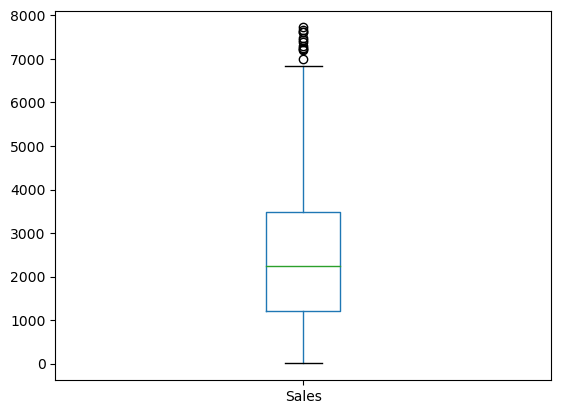

In [54]:
plot_boxplot(metrics_no_outliers,"Sales")

In [55]:
metrics_no_outliers.head(700).sort_values(by=["Sales"],axis=0,ascending=False)

,Customer_ID,Sales,Frequency,Recency
410,JW-15220,7721.7140,6,42
451,LC-16885,7663.1260,12,16
394,JM-15865,7625.0760,7,109
349,JD-15895,7610.8640,11,394
602,PO-18850,7473.8282,11,4
...,...,...,...,...
690,SG-20890,47.9460,3,226
659,RS-19870,22.3280,2,19
508,MG-18205,16.7390,1,264
145,CJ-11875,16.5200,1,365


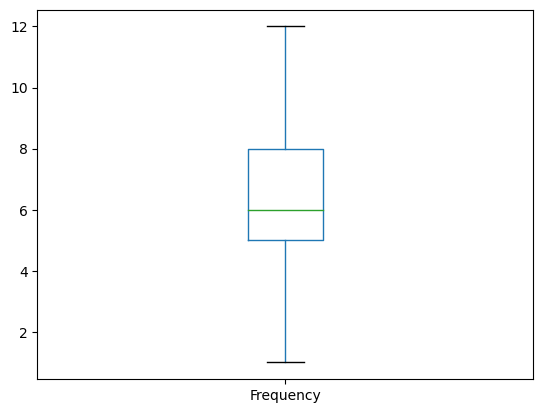

In [56]:
plot_boxplot(metrics_no_outliers,"Frequency")

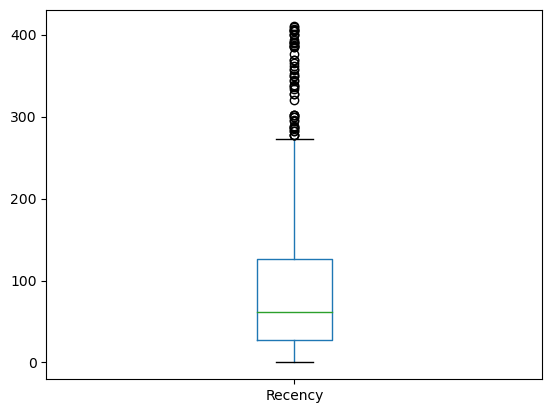

In [57]:
plot_boxplot(metrics_no_outliers,"Recency")

In [58]:
metrics_no_outliers.head(700).sort_values(by="Recency",ascending=False, axis=0)

,Customer_ID,Sales,Frequency,Recency
579,ON-18715,1567.520,9,410
337,IM-15055,2872.630,3,409
419,KC-16255,2120.954,6,407
771,TT-21265,439.500,3,406
572,NP-18685,1228.698,6,406
...,...,...,...,...
108,BS-11755,2562.382,7,1
603,PO-18865,2493.214,7,0
132,CC-12430,2870.050,10,0
251,EB-13975,1643.255,4,0


                                                                        FEATURE SCALING (MinMax)

In [59]:
scaler=MinMaxScaler()
features_df1=metrics_no_outliers.iloc[:,1:4]
features_df_rescaled=scaler.fit_transform(features_df1)
features_df_rescaled.shape


(672, 3)

In [60]:
features_df_rescaled=pd.DataFrame(features_df_rescaled)
features_df_rescaled.columns=["Sales","Frequency","Recency"]
features_df_rescaled.head(5)

,Sales,Frequency,Recency
0,0.720333,0.363636,0.448780
1,0.136267,0.727273,0.046341
2,0.231399,0.272727,0.631707
3,0.658569,0.454545,0.134146
4,0.124646,0.363636,0.100000


                                                                    K-MEANS  CLUSTERING

In [61]:
Kmeans=KMeans(n_clusters=4)
Kmeans.fit(features_df_rescaled)

KMeans(n_clusters=4)

In [62]:
Kmeans.cluster_centers_

array([[0.32518006, 0.63717532, 0.13712979],
       [0.2156352 , 0.36633663, 0.70654431],
       [0.17495463, 0.31589871, 0.16441697],
       [0.68958704, 0.64275568, 0.18149771]])

In [63]:
from collections import Counter

Kmeans.labels_
label_list=Kmeans.labels_
#???????????????????
#Counter(label_list).items(features_df_rescaled)

In [64]:
#assign the cluster label
features_df_rescaled["Cluster_Id"]=Kmeans.labels_
features_df_rescaled.head()

,Sales,Frequency,Recency,Cluster_Id
0,0.720333,0.363636,0.448780,3
1,0.136267,0.727273,0.046341,0
2,0.231399,0.272727,0.631707,1
3,0.658569,0.454545,0.134146,3
4,0.124646,0.363636,0.100000,2


In [65]:
metrics_full=pd.merge(metrics_no_outliers["Customer_ID"],features_df_rescaled,left_index=True,right_index=True)

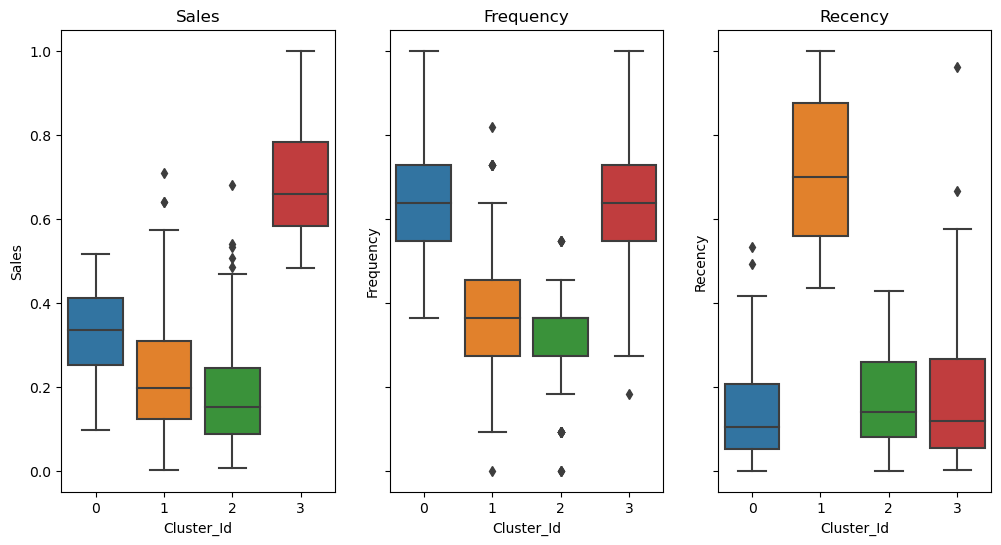

In [66]:
fig,axs=plt.subplots(1,3,figsize=(12,6),sharey=True)
axs[0].set_title("Sales")
axs[1].set_title("Frequency")
axs[2].set_title("Recency")
sns.boxplot(x="Cluster_Id",y="Sales",data=metrics_full,ax=axs[0])
sns.boxplot(x="Cluster_Id",y="Frequency",data=metrics_full,ax=axs[1])
sns.boxplot(x="Cluster_Id",y="Recency",data=metrics_full,ax=axs[2])
plt.savefig("boxplot_hue",bbox_inches="tight")
plt.show()

In [67]:
metrics_full.head()

,Customer_ID,Sales,Frequency,Recency,Cluster_Id
0,AA-10315,0.720333,0.363636,0.448780,3
1,AA-10375,0.136267,0.727273,0.046341,0
2,AA-10480,0.231399,0.272727,0.631707,1
3,AA-10645,0.658569,0.454545,0.134146,3
7,AB-10150,0.195808,0.272727,0.121951,2


In [68]:
metrics_full.to_csv("/Users/Yanaorfin_1/Documents/Academy/E_Commerce/metrics_full.csv")

In [69]:
df1=metrics_full[metrics_full.Cluster_Id==0]
df2=metrics_full[metrics_full.Cluster_Id==1]
df3=metrics_full[metrics_full.Cluster_Id==2]
df4=metrics_full[metrics_full.Cluster_Id==3]
plt.scatter(x=df1.Sales,y=df1.Frequency,color="red")
plt.scatter(x=df2.Sales,y=df2.Frequency,color="blue")
plt.scatter(x=df3.Sales,y=df3.Frequency,color="green")
plt.scatter(x=df4.Sales,y=df4.Frequency,color="purple")

In [70]:
metrics_full_real_numbers=metrics_full.drop(labels=["Sales","Frequency","Recency"],axis=1)

In [71]:
metrics_full_real_number=metrics_full_real_numbers.merge(metric_list,on="Customer_ID",how="inner")

In [72]:
metrics_full_real_number.head()

,Customer_ID,Cluster_Id,Sales,Frequency,Recency
0,AA-10315,3,5563.560,5,184
1,AA-10375,0,1056.390,9,19
2,AA-10480,1,1790.512,4,259
3,AA-10645,3,5086.935,6,55
4,AB-10150,2,966.710,5,41


In [73]:
# with real numbers

df1_real_num=metrics_full_real_number[metrics_full_real_number.Cluster_Id==0]
df2_real_num=metrics_full_real_number[metrics_full_real_number.Cluster_Id==1]
df3_real_num=metrics_full_real_number[metrics_full_real_number.Cluster_Id==2]
df4_real_num=metrics_full_real_number[metrics_full_real_number.Cluster_Id==3]
plt.scatter(x=df1_real_num.Sales,y=df1_real_num.Frequency,color="red")
plt.scatter(x=df2_real_num.Sales,y=df2_real_num.Frequency,color="blue")
plt.scatter(x=df3_real_num.Sales,y=df3_real_num.Frequency,color="green")
plt.scatter(x=df4_real_num.Sales,y=df4_real_num.Frequency,color="purple")

In [74]:
metrics_full_real_numbers

,Customer_ID,Cluster_Id
0,AA-10315,3
1,AA-10375,0
2,AA-10480,1
3,AA-10645,3
7,AB-10150,2
...,...,...
664,SB-20170,0
665,SB-20185,1
668,SC-20050,0
670,SC-20230,3


In [75]:

sns.scatterplot(data=df1,y="Recency",x="Frequency",size="Sales",color="red").set(title="1st Cluster (red) & 2st Cluster (green)")
sns.scatterplot(data=df2,y="Recency",x="Frequency",size="Sales",color="green").set(title="1st Cluster (red) & 2st Cluster (green)")

#sns.scatterplot(data=df3,y="Recency",x="Frequency",size="Sales",color="blue")
#sns.scatterplot(data=df4,y="Recency",x="Frequency",size="Sales",color="purple")

[Text(0.5, 1.0, '1st Cluster (red) & 2st Cluster (green)')]

In [76]:
sns.scatterplot(data=df3,y="Recency",x="Frequency",size="Sales",color="blue").set(title="3rd Cluster (blue) & 4th Cluster (purple)")
sns.scatterplot(data=df4,y="Recency",x="Frequency",size="Sales",color="purple")

<AxesSubplot:title={'center':'3rd Cluster (blue) & 4th Cluster (purple)'}, xlabel='Frequency', ylabel='Recency'>

In [77]:
sns.scatterplot(data=df1,y="Recency",x="Frequency",size="Sales",color="red").set(title="1st Cluster (red) & 3rd Cluster (blue)")
sns.scatterplot(data=df3,y="Recency",x="Frequency",size="Sales",color="blue")

<AxesSubplot:title={'center':'1st Cluster (red) & 3rd Cluster (blue)'}, xlabel='Frequency', ylabel='Recency'>

/var/folders/0g/qs1_nm7j3n30v6qskgpxqmd80000gn/T/ipykernel_12326/889419423.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


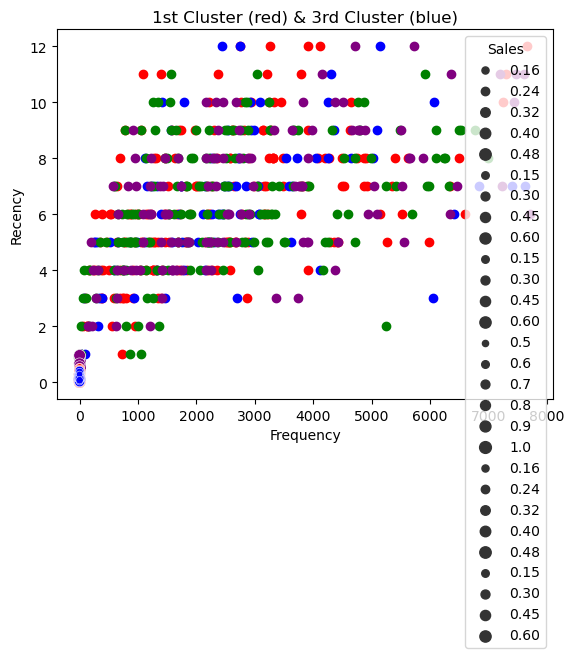

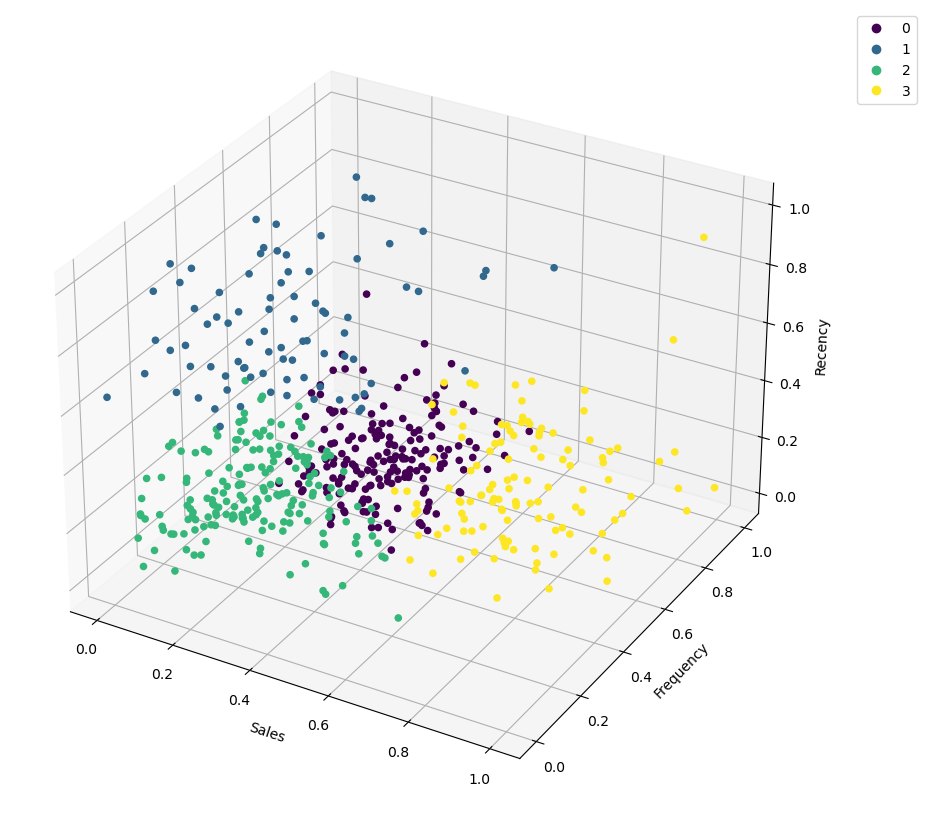

In [78]:
#3D scatter plot (scalled feature)
 
# axes instance
x = metrics_full["Sales"]
y = metrics_full["Frequency"]
z = metrics_full["Recency"]
hue = metrics_full["Cluster_Id"]

fig=plt.figure(figsize=(12,8))
ax=Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn (it's pretty)
#cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, c=hue, alpha=1)
ax.set_xlabel("Sales")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

#legend 

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.savefig("scatter_hue",bbox_inches="tight")

plt.show()

/var/folders/0g/qs1_nm7j3n30v6qskgpxqmd80000gn/T/ipykernel_12326/3935054574.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


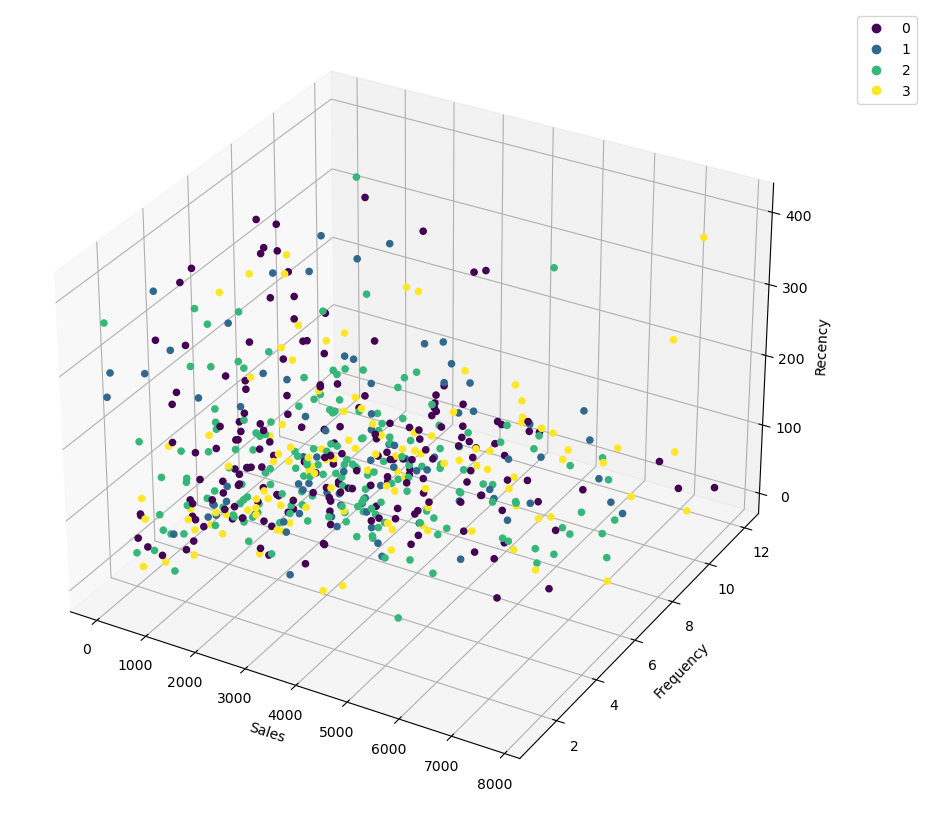

In [79]:
#3D scatter plot (real numbers)
 
# axes instance
x = metrics_full_real_number["Sales"]
y = metrics_full_real_number["Frequency"]
z = metrics_full_real_number["Recency"]
hue = metrics_full_real_number["Cluster_Id"]

fig=plt.figure(figsize=(12,8))
ax=Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn (it's pretty)
#cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc_real = ax.scatter(x, y, z, c=hue, alpha=1)
ax.set_xlabel("Sales")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

#legend 

plt.legend(*sc_real.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.savefig("scatter_hue_real:numbers",bbox_inches="tight")

#Animation

def gen():
    for phi in np.linspace(0,2*pi,100):
        yield np.cos(phi), np.sin(phi), phi

def update(data):
    p1, q1, psi = data
    f1.set_data(p1,q1)
    #f1.set_3d_properties(psi)

ani = animation.FuncAnimation(fig, update, gen, blit=False, interval=100, repeat=True)
#ani.save('matplot003.gif', writer='imagemagick')

plt.show()

                                                        Finding the optimal number of clusters
                                                                    The Elbow Method
                                                                    Silhouette Analysis

In [80]:
#The Elbow Method (SSD)

ssd=[]
range_n_clusters=[1,2,3,4,5,6,7,8,9,10]
for num_clusters in range_n_clusters:
    Kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    Kmeans.fit(features_df_rescaled)
    ssd.append(Kmeans.inertia_)
    plt.plot(ssd)
   



In [81]:
#Silhouette Analysis

range_n_clusters=[2,3,4,5,6,7,8,9,10]
for num_clusters in range_n_clusters:
    Kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    Kmeans.fit(features_df_rescaled)
    cluster_labels=Kmeans.labels_
    Silhouette_avg=metrics.silhouette_score(features_df_rescaled,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, Silhouette_avg))

For n_clusters=2, the silhouette score is 0.6541369814034238
For n_clusters=3, the silhouette score is 0.643374930070208
For n_clusters=4, the silhouette score is 0.7521024155964012
For n_clusters=5, the silhouette score is 0.5928596790470058
For n_clusters=6, the silhouette score is 0.5218835817939785
For n_clusters=7, the silhouette score is 0.33747282509062493
For n_clusters=8, the silhouette score is 0.29370546618440435
For n_clusters=9, the silhouette score is 0.2948560822837496
For n_clusters=10, the silhouette score is 0.308515432548431


                                                        CLUSTERING WITH ANOTHER SCALING METHOD

In [82]:
scaler2=StandardScaler()
features_df1_1=metrics_no_outliers.iloc[:,1:4]
features_df_standardScaler=scaler2.fit_transform(features_df1_1)
features_df_standardScaler.shape

(672, 3)

In [83]:
features_df_standardScaler=pd.DataFrame(features_df_standardScaler)
features_df_standardScaler.columns=["Sales","Frequency","Recency"]
features_df_standardScaler.head(5)

,Sales,Frequency,Recency
0,1.757392,-0.613503,0.872368
1,-0.866655,1.113299,-0.809627
2,-0.439254,-1.045204,1.636911
3,1.479903,-0.181802,-0.442646
4,-0.918866,-0.613503,-0.585361


In [84]:
Kmeans_standard=KMeans(n_clusters=4)
Kmeans_standard.fit(features_df_standardScaler)

KMeans(n_clusters=4)

In [85]:
#assign cluster's labels 
features_df_standardScaler["Cluster_ID"]=Kmeans_standard.labels_
features_df_standardScaler.head(5)

,Sales,Frequency,Recency,Cluster_ID
0,1.757392,-0.613503,0.872368,1
1,-0.866655,1.113299,-0.809627,2
2,-0.439254,-1.045204,1.636911,3
3,1.479903,-0.181802,-0.442646,1
4,-0.918866,-0.613503,-0.585361,0


In [86]:
metrics_full_SS=pd.merge(metrics_no_outliers["Cluster_ID"],features_df_standardScaler,left_index=True,right_index=True)

KeyError: 'Cluster_ID'

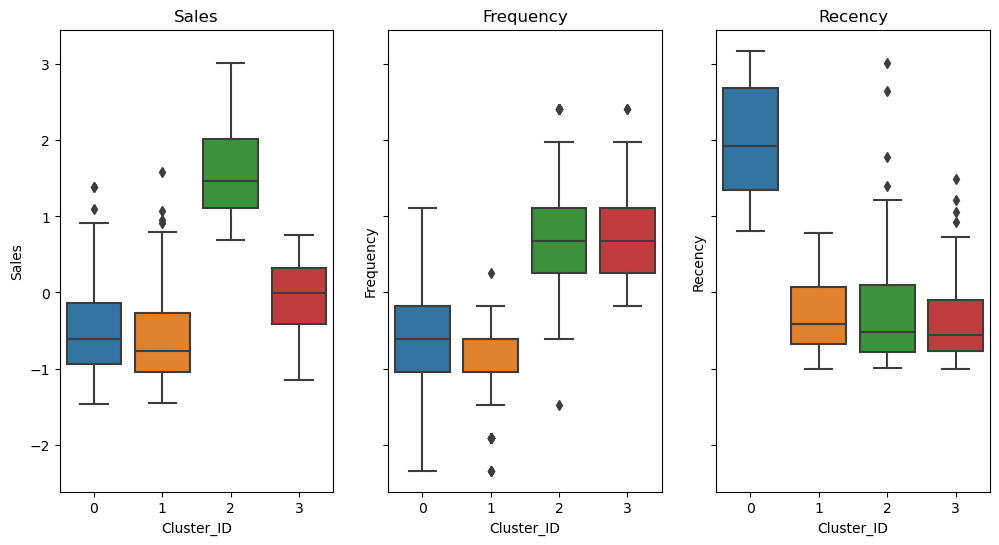

In [ ]:
fig,axs=plt.subplots(1,3,figsize=(12,6),sharey=True)
axs[0].set_title("Sales")
axs[1].set_title("Frequency")
axs[2].set_title("Recency")
sns.boxplot(x="Cluster_ID",y="Sales",data=metrics_full_SS,ax=axs[0])
sns.boxplot(x="Cluster_ID",y="Frequency",data=metrics_full_SS,ax=axs[1])
sns.boxplot(x="Cluster_ID",y="Recency",data=metrics_full_SS,ax=axs[2])
plt.savefig("boxplot_hue_ss",bbox_inches="tight")
plt.show()

/var/folders/0g/qs1_nm7j3n30v6qskgpxqmd80000gn/T/ipykernel_32873/4170464680.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


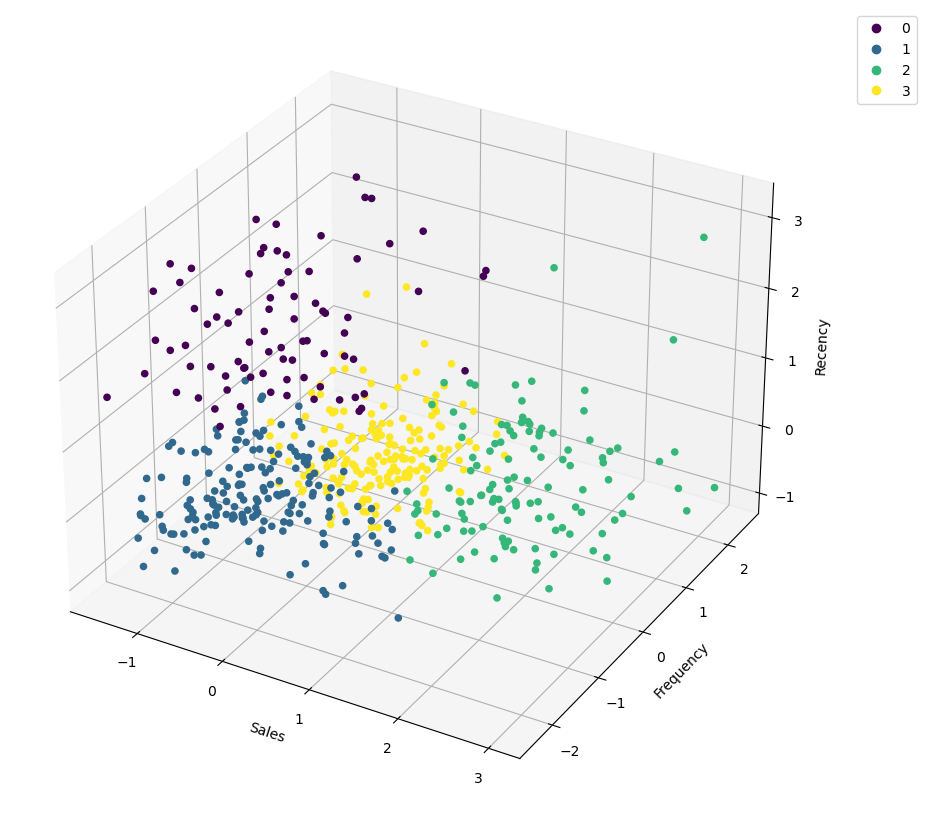

In [ ]:
#3D scatter plot (scalled feature)
 
# axes instance
x = metrics_full_SS["Sales"]
y = metrics_full_SS["Frequency"]
z = metrics_full_SS["Recency"]
hue = metrics_full_SS["Cluster_ID"]

fig=plt.figure(figsize=(12,8))
ax=Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn (it's pretty)
#cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc_standard = ax.scatter(x, y, z, c=hue, alpha=1)
ax.set_xlabel("Sales")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

#legend 

plt.legend(*sc_standard.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.savefig("scatter_hue_ss",bbox_inches="tight")

plt.show()

                                                        Finding the optimal number of clusters (for standardscaler)
                                                                                The Elbow Method
                                                                                Silhouette Analysis

In [ ]:
range_n_clusters

[2, 3, 4, 5, 6, 7, 8, 9, 10]

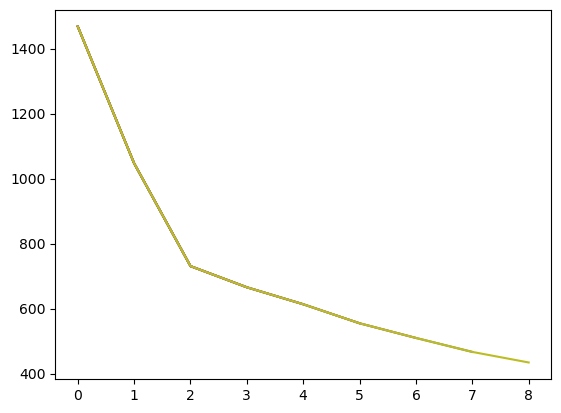

In [ ]:
# The Elbow Method
ssd1=[]
for num_clusters in range_n_clusters:
    Kmeans_standard=KMeans(n_clusters=num_clusters)
    Kmeans_standard.fit(features_df_standardScaler)
    ssd1.append(Kmeans_standard.inertia_)
    plt.plot(ssd1)


In [ ]:
#Silhouette Analysis

for num_clusters in range_n_clusters:
    Kmeans_standard=KMeans(n_clusters=num_clusters)
    Kmeans_standard.fit(features_df_standardScaler)
    cluster_labels=Kmeans_standard.labels_
    Silhouette_avg2=silhouette_score(features_df_standardScaler,cluster_labels)
    print("For n_cluster={0}, the silhouette score is {1}".format(num_clusters,Silhouette_avg2))


For n_cluster=2, the silhouette score is 0.44743993590069747
For n_cluster=3, the silhouette score is 0.44549379887139695
For n_cluster=4, the silhouette score is 0.4601967093823442
For n_cluster=5, the silhouette score is 0.3949911863076518
For n_cluster=6, the silhouette score is 0.36332070016988205
For n_cluster=7, the silhouette score is 0.3568128616592169
For n_cluster=8, the silhouette score is 0.283946661887219
For n_cluster=9, the silhouette score is 0.2922942382221492
For n_cluster=10, the silhouette score is 0.2920426384600706
